In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statds.no_parametrics import friedman, nemenyi

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

algorithms = ['micro-level', 'group-embedding', 'subgroups', 'pca+pcmci', 'pca+dynotears']

In [ ]:
dfs = {alg: pd.read_csv(f'results_{alg}.csv').assign(algorithm=alg) for alg in algorithms}
# Take just the forth iteration, i.e., with 10 variables per group
dfs = {alg: df[df['dataset_iteration'] == 3].reset_index(drop=True) for alg, df in dfs.items()}
for df in dfs.values():
    df['index'] = df.index

precisions = pd.DataFrame({alg: df['precision'] for alg, df in dfs.items()})
recalls = pd.DataFrame({alg: df['recall'] for alg, df in dfs.items()})
f1s = pd.DataFrame({alg: df['f1'] for alg, df in dfs.items()})
shds = pd.DataFrame({alg: df['shd'] for alg, df in dfs.items()})
f1s.head()

,micro-level,group-embedding,subgroups,pca+pcmci,pca+dynotears
0,0.549020,0.666667,0.682927,0.550000,0.693878
1,0.504505,0.619718,0.722222,0.526316,0.500000
2,0.565657,0.702703,0.642857,0.521739,0.447368
3,0.500000,0.685714,0.658537,0.450000,0.454545
4,0.494845,0.666667,0.594595,0.650000,0.548387


Performing tests on precision
Reject H0 with alpha = 0.05 (Different distributions)
Statistic 78.01599999999996, Critical Value 9.488, p-value 5.877787145891489e-11
{'micro-level': 4.96, 'group-embedding': 2.84, 'subgroups': 3.28, 'pca+pcmci': 1.04, 'pca+dynotears': 2.88}
[4.96, 2.84, 3.28, 1.04, 2.88]
1.21989793890345




Performing tests on recall
Reject H0 with alpha = 0.05 (Different distributions)
Statistic 90.53600000000006, Critical Value 9.488, p-value 7.94395660363989e-11
{'micro-level': 1.28, 'group-embedding': 2.78, 'subgroups': 1.94, 'pca+pcmci': 4.96, 'pca+dynotears': 4.04}
[1.28, 2.78, 1.94, 4.96, 4.04]
1.21989793890345


Performing tests on f1
Reject H0 with alpha = 0.05 (Different distributions)
Statistic 69.47199999999998, Critical Value 9.488, p-value 3.653866098574099e-11
{'micro-level': 3.68, 'group-embedding': 1.44, 'subgroups': 1.72, 'pca+pcmci': 4.28, 'pca+dynotears': 3.88}
[3.68, 1.44, 1.72, 4.28, 3.88]
1.21989793890345


Performing tests on shd
Reject H0 with alpha = 0.05 (Different distributions)
Statistic 63.13599999999997, Critical Value 9.488, p-value 3.774791590416271e-11
{'micro-level': 5.0, 'group-embedding': 2.32, 'subgroups': 3.0, 'pca+pcmci': 1.64, 'pca+dynotears': 3.04}
[5.0, 2.32, 3.0, 1.64, 3.04]
1.21989793890345




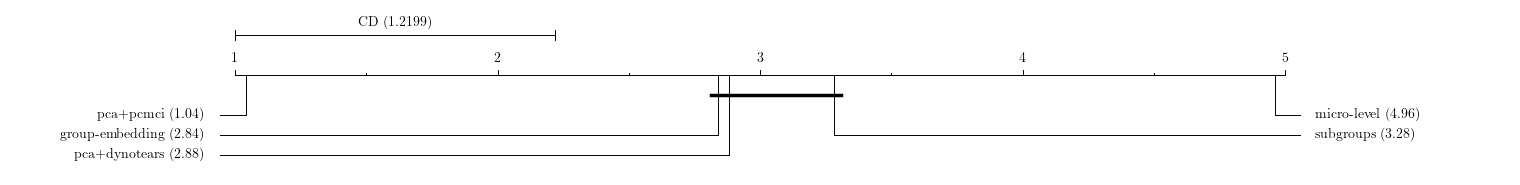

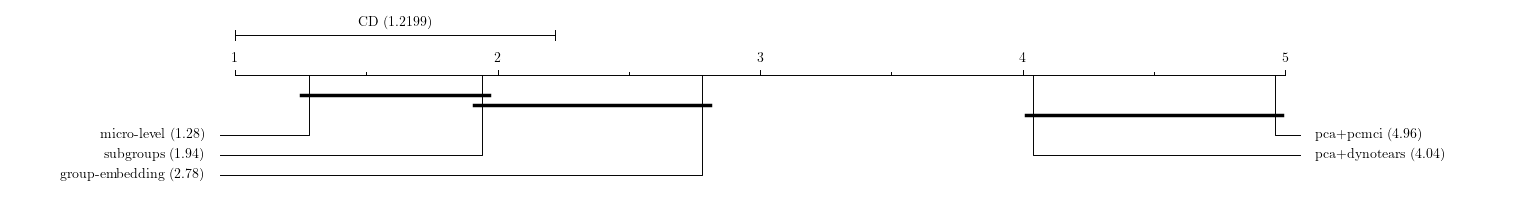

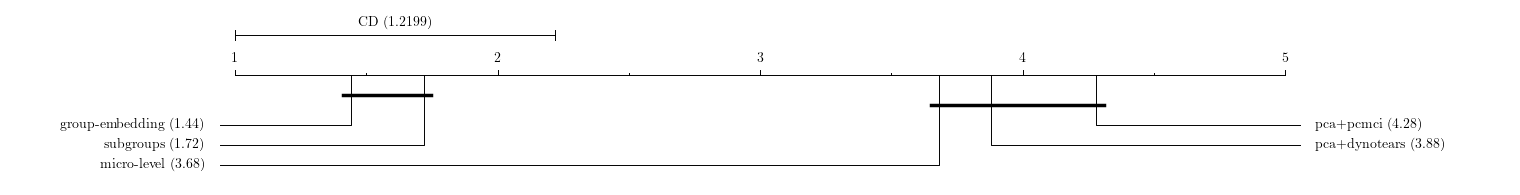

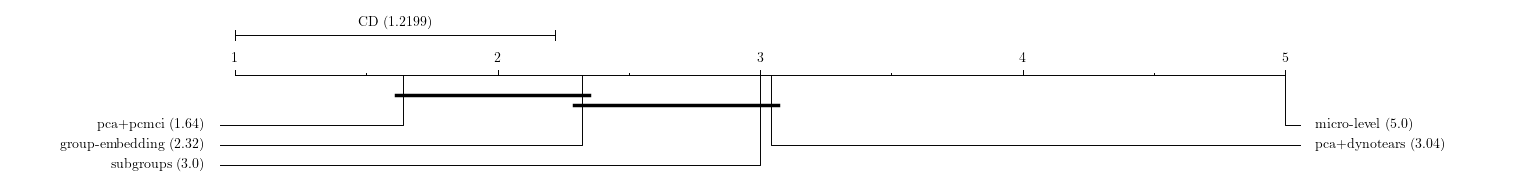

In [ ]:
def apply_nemenyi(score_name, score_values, alpha=0.05):
    score_values = score_values.copy()
    score_values.insert(0, 'id', score_values.index)
    print(f'Performing tests on {score_name}')
    rankings, statistic, p_value, critical_value, hypothesis = friedman(score_values, alpha,
                                    minimize=True if score_name in ['shd'] else False)
    print(hypothesis)
    print(f"Statistic {statistic}, Critical Value {critical_value}, p-value {p_value}")
    print(rankings)

    ranks_values, critical_distance_nemenyi, figure = nemenyi(rankings, 25, alpha)
    print(ranks_values)
    print(critical_distance_nemenyi)
    plt.savefig(f'nemenyi_{score_name}.pdf', bbox_inches='tight')
    
for score_name, score_values in [('precision', precisions), ('recall', recalls), ('f1', f1s), ('shd', shds),]:
    apply_nemenyi(score_name, score_values)
    print()
    print()